#### The roadmap of my analysis

# 1. EXPLORATORY DATA ANALYSIS

## FORM ANALYSIS

- importing datas value
- Shape of data : **(458213, 26)**
- determine the number and types of data
     - **object     19**
     - **float64     4**
     - **int64       3**


- Target of data = **price**
- **information sur le target :**
     - **PRICE---------- DESCRIPTION**
          - count  --  4.229830e+05
          - mean   --  4.378756e+04
          - std    --  8.529028e+06
          - min    --  2.000000e+00
          - 25%    --  5.995000e+03
          - 50%    --  1.249500e+04
          - 75%    --  2.295000e+04
          - max    --  3.615215e+09
            
- Analysis of NAN values :
    - il y'a des variables manquantes mais pas de grande quantité
    - on constate en même temps que y'a des columns qui ne servent a rien dans notre analyse
    il y'a de colonnes qui renvoient a des lien et a des images ou encore a des carcterisque qui n'ont rien a avoir avec les voitures a notre avis
    
    
    
 ## INNER ANALYSIS
 - We now go to remove some column like: **['image_url','description','posting_date','size', 'state', 'VIN', 'region_url', 'region', 'url', 'long','id', 'lat', 'model', 'manufacturer', 'Unnamed: 0', 'odometer']**


Nous avons choisi de supprimer les donnes pas en fonction des nombres de donne mais  en fonction des variabes qui ont un petit lien avec les voitures
 

Maitenant nous nous limitons avec seulement **11** colonnes
 
 - Mais vu que y'a des lignes qui n'ont pas de variables prix, nous allons de plus les supprimer c'est a dire celle qui ont comme prix **0**
 
 - On peur costater que si l'on analyse les variables qualitatives en fonction du target, on n'obtient pas les vraies valeurs cela peut donc signifier que ca ne joue pas trop sur les prix de voitures par exemple la couleur
 - On apperçoit aussi la presence des outliers dont nous reviendront plutard sur la dessus
 - On constate neamoins beaucoup de voitures a boite automatique sont commercialisée
 
 
 ### MORE ANALYSIS
-  On peut en plus des analyses precedantes ajouter que :
     - l'odomètre que nous avons avions considéré comme critère de prix ne l'est pas vu qu'il son taux de correlation est très faible et inferieur a **0**
     - En plus de cela , l'année de la voiture de la voiture ne joue pas un rôle essentiel dans le prix basé aussi sur les tests de corelation
     

In [2]:
import pandas as pd

pd.set_option('display.max_row',26)

donne = pd.read_csv('pratices/vehicules.csv')


In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.max_column',26)

donnee = donne.copy()
donnee.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [4]:
donnee.select_dtypes('object')
sup = ['image_url','description','posting_date','size', 'state', 'VIN', 'region_url', 'region', 'url', 'long',
       'id', 'lat', 'Unnamed: 0']
donnee.drop(sup, axis=1, inplace=True)
data = donnee[donnee.price > 1]

In [5]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,other,NaN
1,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,NaN
2,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,SUV,blue
3,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue
4,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue


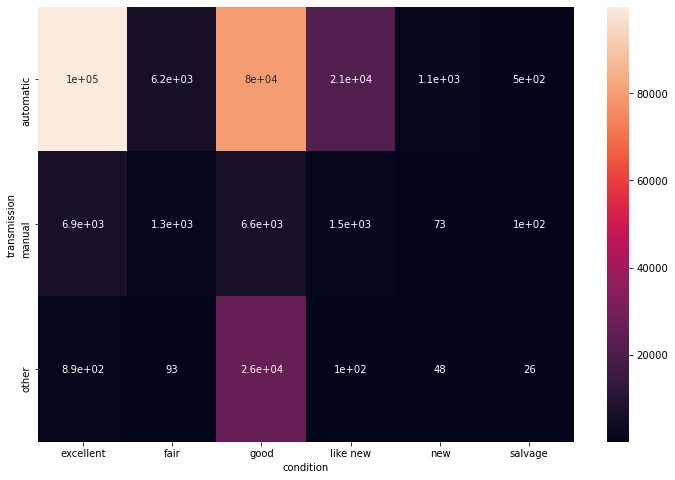

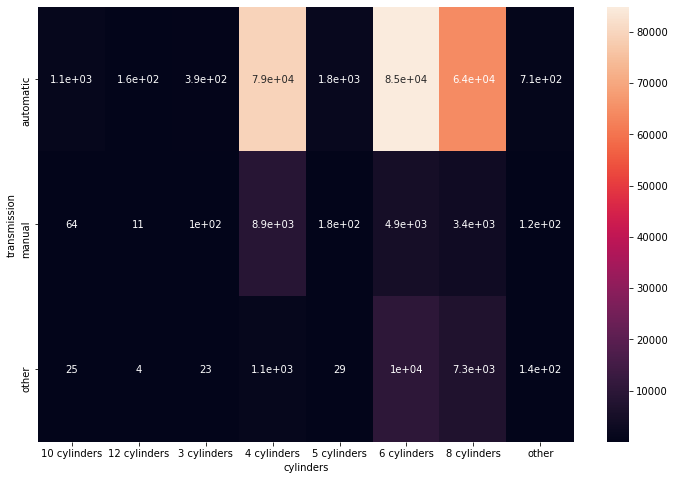

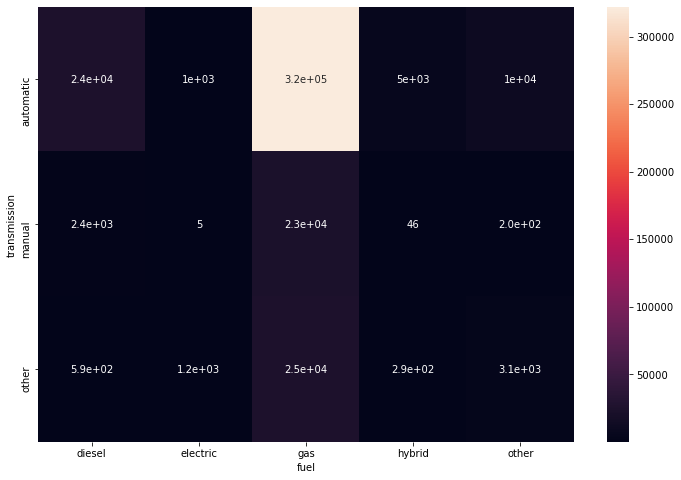

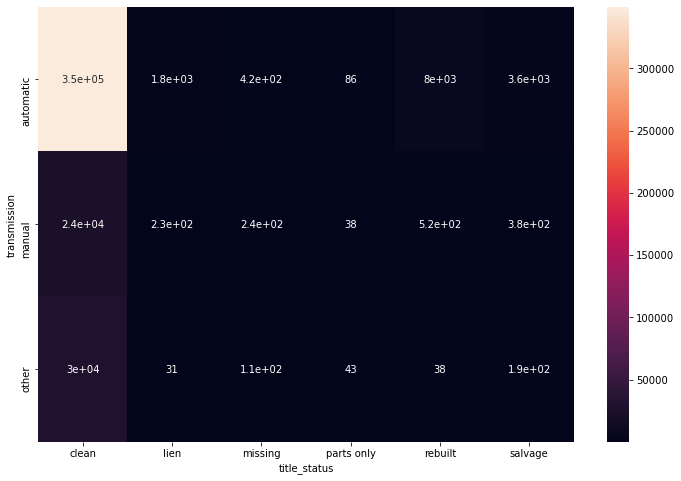

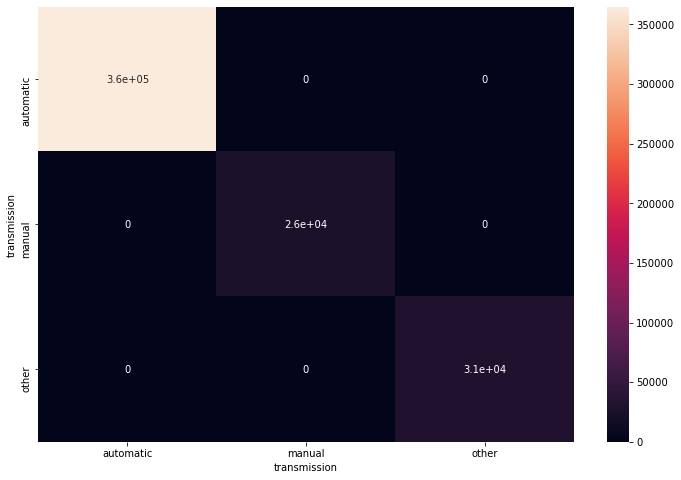

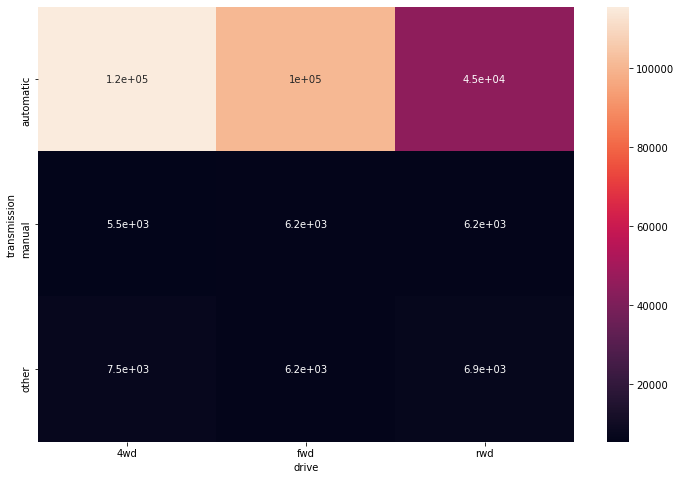

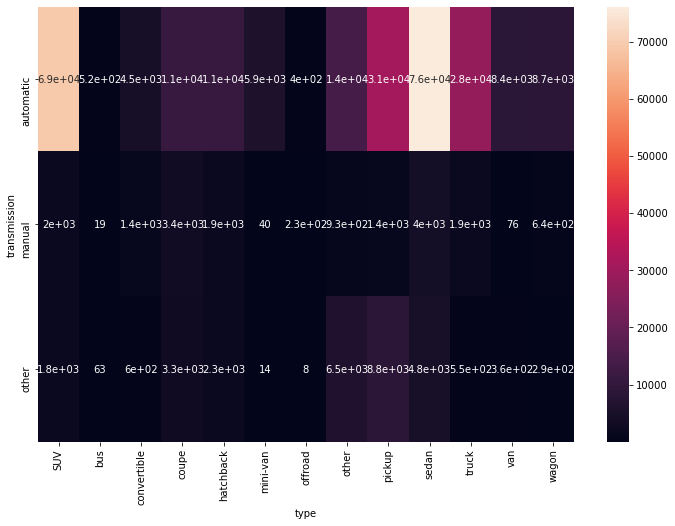

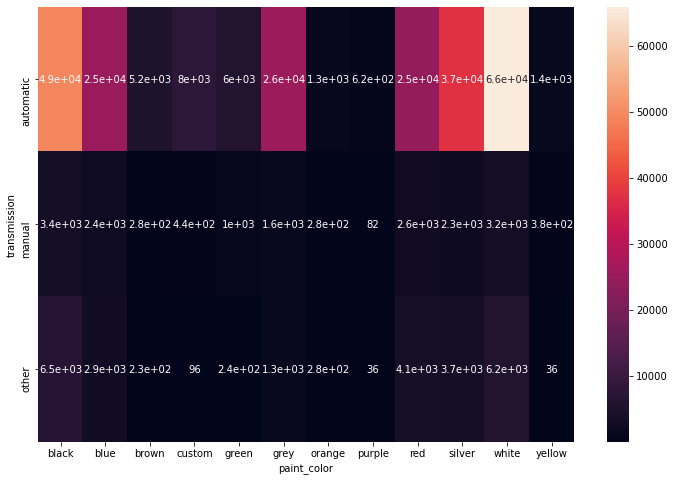

In [6]:
for don in data.drop(['manufacturer', 'model'], axis=1).select_dtypes('object'):
    plt.figure(figsize=(12,8))
    sb.heatmap(pd.crosstab(data.transmission, data[don]), annot=True)
    

In [7]:
for don in data.select_dtypes('object'):
    print()
    print(f'{don.upper() :-<45} {data[don].unique()}')



MANUFACTURER--------------------------------- ['chevrolet' 'hyundai' 'bmw' 'ford' 'toyota' 'jeep' 'ram' nan 'honda'
 'dodge' 'lexus' 'mercedes-benz' 'cadillac' 'gmc' 'subaru' 'infiniti'
 'mazda' 'mini' 'nissan' 'volkswagen' 'kia' 'lincoln' 'mitsubishi' 'buick'
 'audi' 'rover' 'chrysler' 'fiat' 'acura' 'volvo' 'pontiac' 'tesla'
 'saturn' 'mercury' 'datsun' 'porsche' 'jaguar' 'ferrari' 'alfa-romeo'
 'harley-davidson' 'land rover' 'aston-martin' 'morgan' 'hennessey']

MODEL---------------------------------------- ['corvette grand sport' 'sonata' 'x3 3.0i' ... "32' 2 car trailer"
 'bluebird 4300' 'caravana']

CONDITION------------------------------------ ['good' 'excellent' nan 'like new' 'fair' 'salvage' 'new']

CYLINDERS------------------------------------ ['8 cylinders' '4 cylinders' '6 cylinders' nan '10 cylinders' 'other'
 '5 cylinders' '3 cylinders' '12 cylinders']

FUEL----------------------------------------- ['gas' 'diesel' 'other' 'hybrid' nan 'electric']

TITLE_STATUS----------

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Owner\anacond

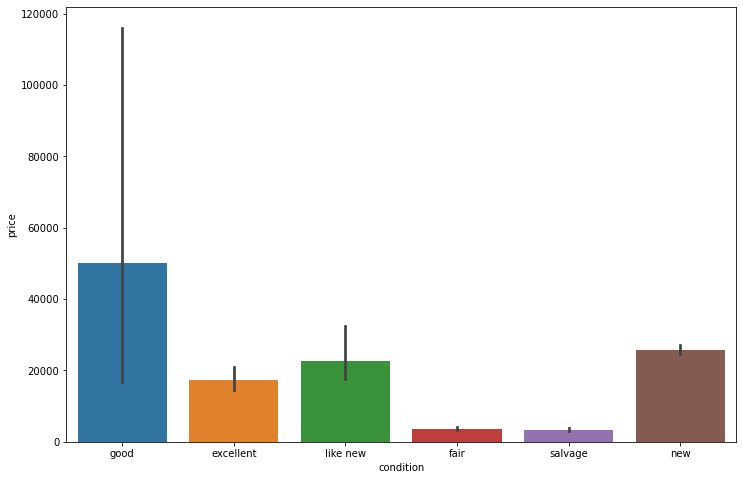

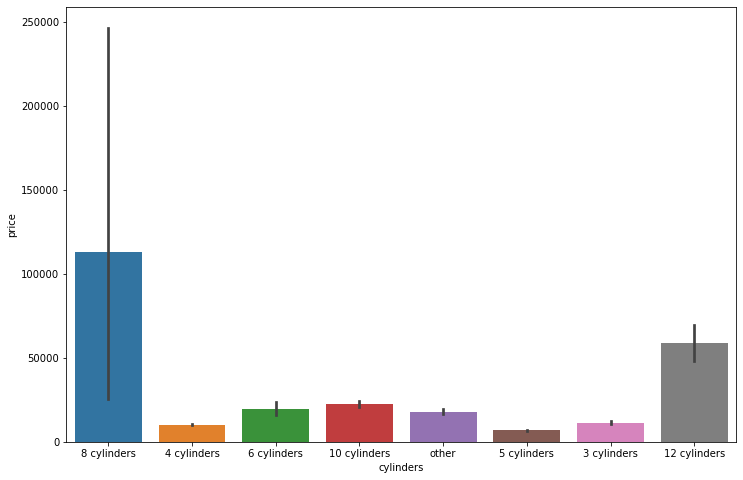

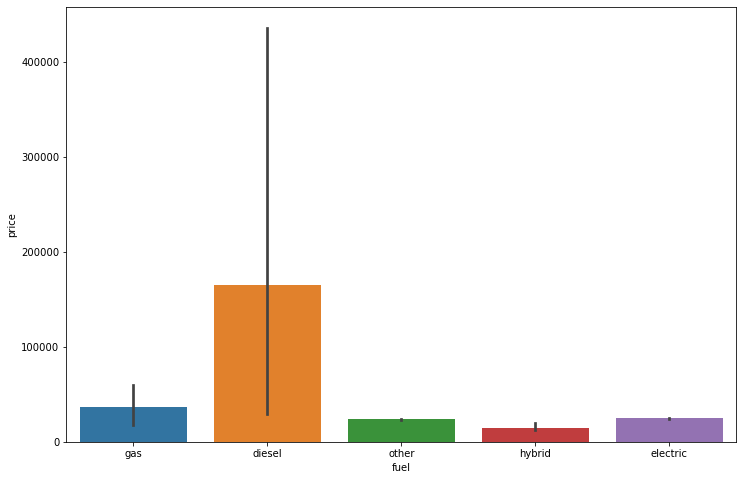

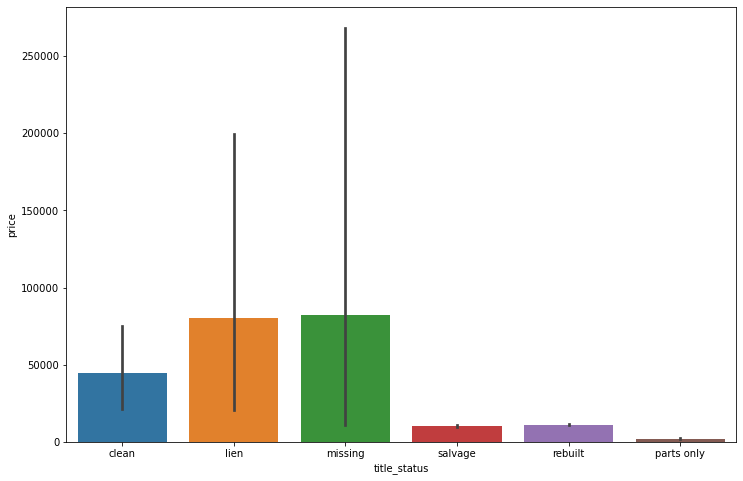

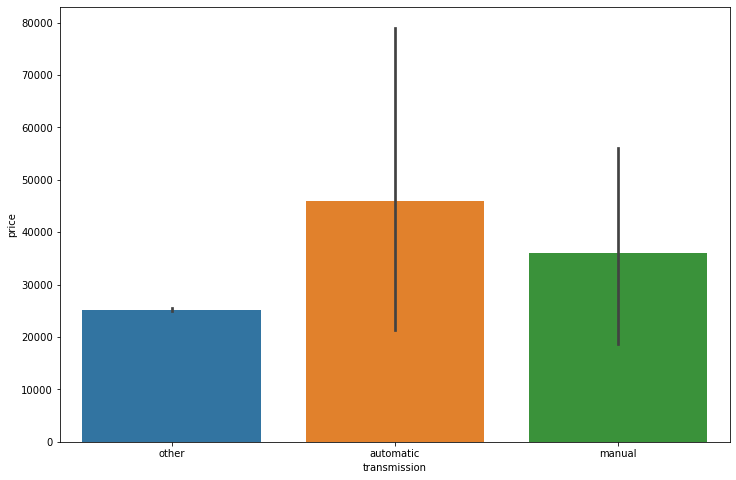

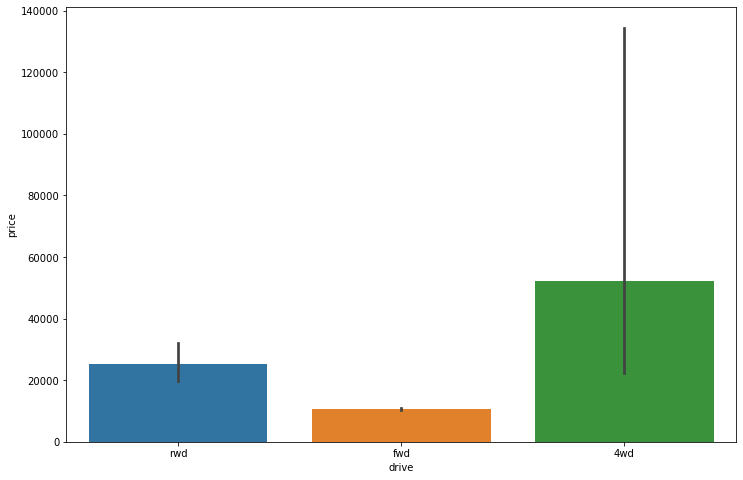

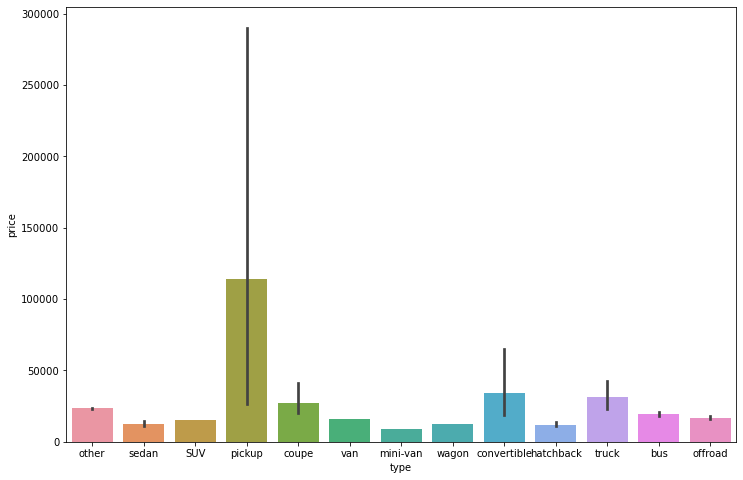

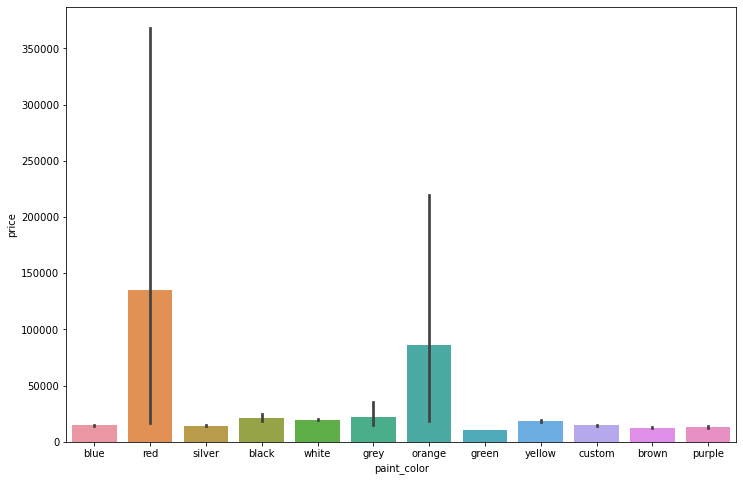

In [8]:
for don in data.drop(['manufacturer', 'model'], axis=1).select_dtypes('object'):
    plt.figure(figsize=(12,8))
    sb.barplot(data[don], data.price)

In [9]:
for i in data.columns:
    print(f'{i.upper() :-<15} {"description".upper()}')
    print(data[i].describe())

PRICE---------- DESCRIPTION
count    4.229830e+05
mean     4.378756e+04
std      8.529028e+06
min      2.000000e+00
25%      5.995000e+03
50%      1.249500e+04
75%      2.295000e+04
max      3.615215e+09
Name: price, dtype: float64
YEAR----------- DESCRIPTION
count    421952.000000
mean       2010.503159
std           8.985746
min        1900.000000
25%        2007.000000
50%        2013.000000
75%        2016.000000
max        2021.000000
Name: year, dtype: float64
MANUFACTURER--- DESCRIPTION
count     406656
unique        43
top         ford
freq       72725
Name: manufacturer, dtype: object
MODEL---------- DESCRIPTION
count     418686
unique     30095
top        f-150
freq        7235
Name: model, dtype: object
CONDITION------ DESCRIPTION
count     252896
unique         6
top         good
freq      112701
Name: condition, dtype: object
CYLINDERS------ DESCRIPTION
count          269218
unique              8
top       6 cylinders
freq            99994
Name: cylinders, dtype: object
FU

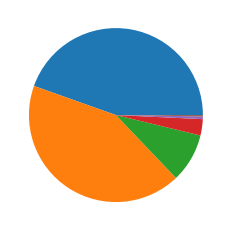

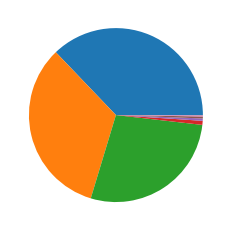

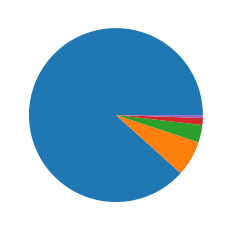

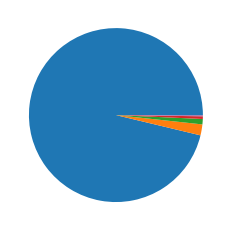

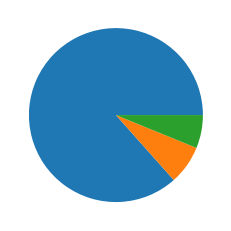

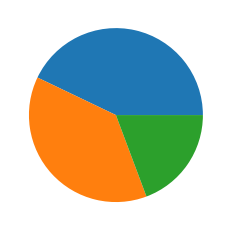

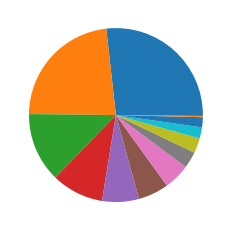

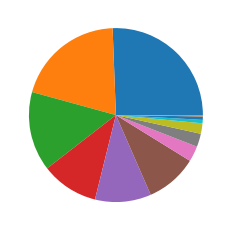

In [10]:
for don in data.drop(['manufacturer', 'model'], axis=1).select_dtypes('object'):
    plt.figure()
    plt.pie(data[don].value_counts())

<AxesSubplot:>

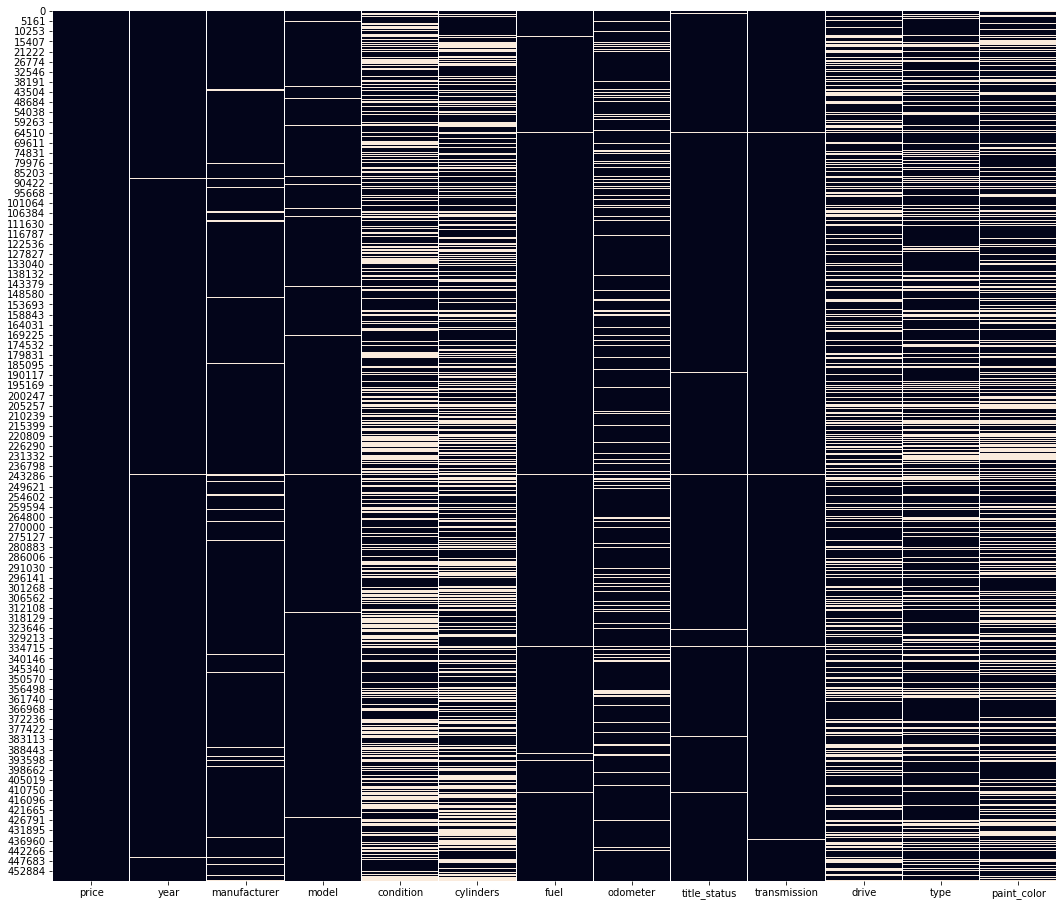

In [11]:
plt.figure(figsize=(18,16))
sb.heatmap(data.isna(), cbar=False)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422983 entries, 0 to 458212
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         422983 non-null  int64  
 1   year          421952 non-null  float64
 2   manufacturer  406656 non-null  object 
 3   model         418686 non-null  object 
 4   condition     252896 non-null  object 
 5   cylinders     269218 non-null  object 
 6   fuel          420325 non-null  object 
 7   odometer      374414 non-null  float64
 8   title_status  421068 non-null  object 
 9   transmission  421186 non-null  object 
 10  drive         300430 non-null  object 
 11  type          318165 non-null  object 
 12  paint_color   295554 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 65.2+ MB


In [13]:
rien = pd.DataFrame(data.price.value_counts().sort_values(ascending=True))
rien.describe()

,price
count,16922.000000
mean,24.996041
std,155.854574
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4003.000000


In [14]:
data.isnull().sum()

price                0
year              1031
manufacturer     16327
model             4297
condition       170087
cylinders       153765
fuel              2658
odometer         48569
title_status      1915
transmission      1797
drive           122553
type            104818
paint_color     127429
dtype: int64

In [16]:
data.corr()['price']

price       1.000000
year       -0.002854
odometer   -0.000015
Name: price, dtype: float64

In [ ]:
sb.heatmap()